# Random Forest Project Prediction of Loan Repayment

## Introduction

Peer to peer lending, or P2P lending, is a relatively new paradigm in lending when compared to traditional bank loans.  Peer to peer lending is the practice of lending money to individuals or businesses through an online service that matches borrowers with lenders. In general, P2P lending services operate as online businesses thus having lower overhead can offer lower rates to their customers and lenders can earn higher returns.  Unlike traditional bank loans many P2P loans are unsecured.  There is of course a risk of borrowers defaulting on these unsecured loans.  P2P lending services do not actually lend money themselves.  They operate as a matching service for borrowers who would like to secure a loan and lenders who have the money to lend.  However as one can imagine the key to the success of a P2P lending service is attracting enough lenders to serve the number of customers needing to borrow money.  P2P borrowers undergo regular credit checks and other credit “worthiness” evaluations prior to receiving a loan.  However, the requirements are often less stringent than would be in securing a loan from a traditional bank and as mentioned previously and the loans are often unsecured.  There are many lenders willing to loan money under these arrangements as their returns are often higher.  However, demand for loans is still generally higher greater than lenders.  A key to business success for a P2P lending service is to attract enough lenders to service their customers.  One crucial way to do this is accurately predict loan defaults.  P2P lending services can more readily attract lenders if they can be confident that the loan will be repaid.  As a private Data Science consultant, I will analyze publicly available loan data from LendingClub.com.  One of the first ever P2P lending companies.  I will use several Machine Learning techniques including the Random Forest Classifier Algorithm to predict loan repayment based on customer profile data.  With this analysis I hope to obtain useful loan repayment data that can be used by other P2P lending services to attract lenders.  Which is of key importance to any P2P lending service.

## The Data

The data to be analyzed is publicly available data from LendingClub.com a popular P2P service.  P2P lenders are interested in borrowers whose profile indicates a high probability of paying you back. P2P services ae interesting in attracting lenders.  I will try to create a model which accurately predicts whether a customer will repay their loan based on customer profile attributes.  This information will ultimately be useful to both the lender and the P2P services trying to attract lenders.

The lending data will be used to classify and predict whether the borrower paid back their loan in full. The following lists the attributes of the data set.  I will do some exploratory data analysis and feature selection to determine the indicators best suited to the model.  I will use the Random Forest Classifier method.  As we are trying to determine one target variable, if the loan was repaid or not, from several other predictor features I think it is a good choice.
Here are what the columns represent:

Here are what the columns in the Data Set represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Methodology

The data set will be read into a pandas data frame for exploratory data analysis and feature selection.  The data will be plotted and analyzed using Matplotlib and seaborn to determine which variable in the data set have the highest predictive potential for our target variable.  Which is loan repayment.  The data will then be prepared for our analysis using the Random Forest classifier method.  Categorical variable will be changed to dummy variables where needed to perform our analysis.  A Decision Tree analysis will also be performed in addition to our Random Forest Model.  With this we can determine which model performs better.  It is also my hope that by performing both models we will get results that are similar in performance.  This will lend some validation that that our models were on track and the results are dependable.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the Data as pandas DataFrame for initial exploratory data analysis

In [6]:
loans = pd.read_csv('loan_data.csv')


In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis

Text(0.5, 0, 'FICO')

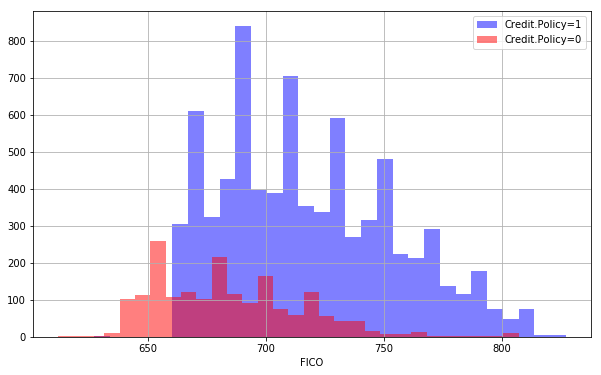

In [10]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

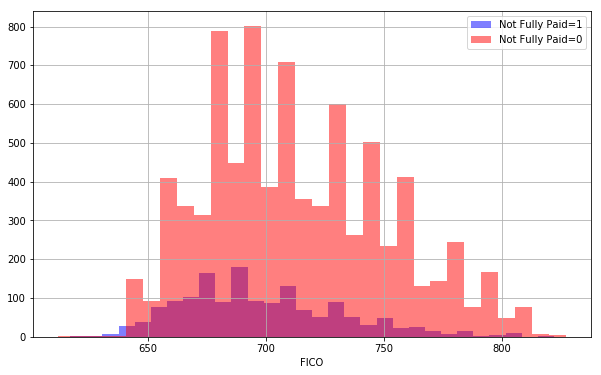

In [11]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Not Fully Paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Not Fully Paid=0')
plt.legend()
plt.xlabel('FICO')

### Create a countplot in seaborn showing the counts of loans by purpose, with the hue defined by not.fully.paid

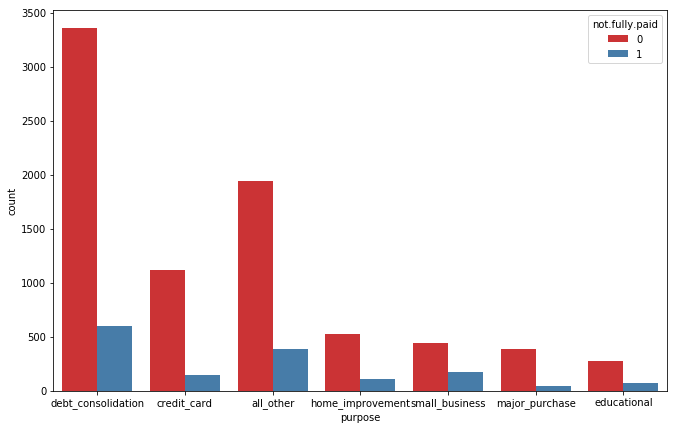

In [12]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

### Look at the trend between FICO score and interest rate

<Figure size 792x504 with 0 Axes>

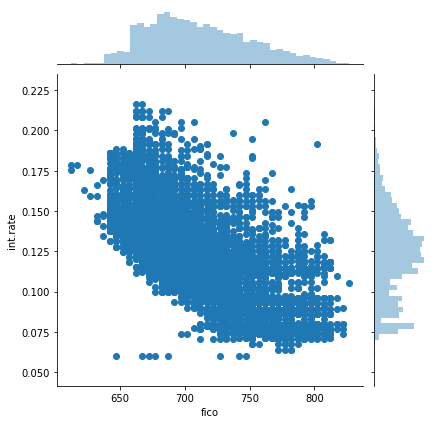

In [13]:
plt.figure(figsize=(11,7))
sns.jointplot(x='fico',y='int.rate',data=loans)

<Figure size 792x504 with 0 Axes>

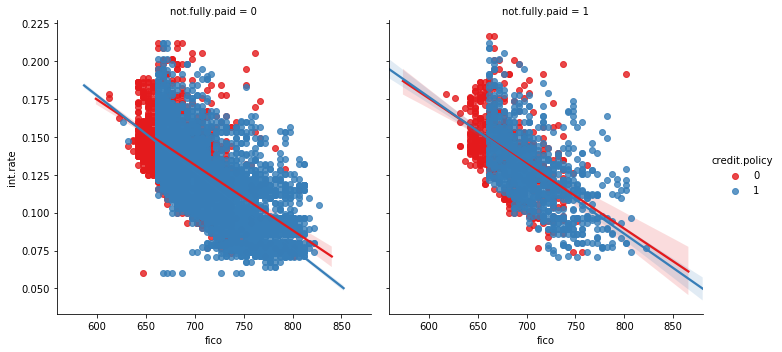

In [14]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',col='not.fully.paid',palette='Set1')

## Setting up the Data

### Transform the Categorical data using dummy variables

In [15]:
cat_feats = ['purpose']

In [16]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Train a Decision Tree Model

### Train a single decision tree first

In [20]:
from sklearn.tree import DecisionTreeClassifier

#### Create an instance of DecisionTreeClassifier and fit it to the training data

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree

In [23]:
predictions = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2666
           1       0.20      0.24      0.22       495

   micro avg       0.73      0.73      0.73      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.73      0.74      3161



In [26]:
print(confusion_matrix(y_test,predictions))

[[2185  481]
 [ 374  121]]


## Now Train a Random Forest Model to Compare

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=300)

In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions and Evaluations from the Random Forest Model

In [30]:
predictions = rfc.predict(X_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2666
           1       0.35      0.01      0.03       495

   micro avg       0.84      0.84      0.84      3161
   macro avg       0.60      0.50      0.47      3161
weighted avg       0.77      0.84      0.77      3161



In [32]:
print(confusion_matrix(y_test,predictions))

[[2653   13]
 [ 488    7]]


## Results

Overall the Random Forest Model performed a little better. With the overall precision increasing from around 75% to 80%. This is in line with my initial assumption.  The Random Forest Algorithm performed slightly better that the Decision Tree.  The two approaches are similar with The Random Forest Model being a slightly more complex derivation.  The Decision Tree Model predicted loan defaults with 75% accuracy and the Random Forest Model with 80% accuracy.  Considering the similarity among the models and the results this gives a good indication that the model worked appropriately. The slight overall performance increase from the Random Forest Model was at a cost in terms prediction by class.  The Decision Tree model performed "better" for the class 1 objects.  In either case I think the model performed well.  Loan default is a difficult target to predict.  A model that can predict loan default with 80% accuracy would still be very useful to both P2P lending services as well as lenders concerned with default.

## Discussion

Predicting loan default can be difficult under any circumstances.  Our data does suggest that there are valuable predictors that can be used along with Machine Leaning to predict loan default at a level valuable to both P2P lending services and to lenders.  Our data set is not comprehensive.  P2P lending has only grown in popularity.  Analyzing the larger data sets that are now becoming available will probably increase the effectiveness of this method even more.  As ever more data is collected on customers, new predictors and better feature selection will surely increase the accuracy of this method. With larger data sets, more comprehensive data and better future feature selection Accuracy determination will surely increase.

## Conclusion

P2P lenders understand that lending in these circumstances is a higher risk higher reward scenario.  Having information that could predict loan default rates at a level of 80% would be a valued commodity for all involved in the process.  As the information about borrowers grows the predictive nature of that data will also grow.  Predicting loan default is now and always has been a difficult proposition.  Banks generally have more stringent rules for borrowers and turn many away.  They can afford to do this because banks have larger assets and can afford to be more selective.  However, this also means that many borrowers who would have repaid their loan were also turned away and the lender missed that revenue.  If machine learning predictions can reduce the risk the lender takes on by accurately predicting who might default on those loans.  Smaller lenders will have more confidence in lending and can more safely lend to those who were otherwise turned away from banks.  And of course, garner the revenue that would have otherwise been lost.  As stated, predicting loan default is a difficult proposition.  P2P lending services need lender in order to operate.  These will only be interested if they have confidence of repayment.  I think this model illustrates that can certainly be achieved at a level suitable to both lender, P2P lending service and customer.  This model predicted default at a level of 80% accuracy.  With more data, eliminating customers who are well below threshold and model revision this could done at an even higher level of accuracy.  This information would be very useful to all involved in the process.